In [104]:
import numpy as np
import random
from scipy.stats import bernoulli
from random import randrange
import matplotlib.pyplot as plt
random.seed(23)

## Modified Monty Hall Game
- You are playing a game that is very similar to the Monty Hall game
- There are 3 identical doors, one having a car behind, and the other two having goats behind
- You pick a door, e.g., the second door
- The host throws a fair coin: if it is heads, then the game ends and your door is opened. Otherwise, 
- The host rolls two fair dice. If the sum of numbers is more than 9, then the game ends similarly. Otherwise, the host opens one of the remaining two doors which has a goat behind.
- The host asks you whether you would like to switch your door. You throw a loaded join which shows head 80\% of the time. If the coin shows head, you switch your door. Otherwise you hold on to your original door.

What is the probability of winning this game? Use Monte Carlo simulation and simulate this game at least $100,000$ times.

In [105]:
#Open a door with a goat behind it 

def open_door(doors, winning_door):
    if len(doors) != 2:
        return None
    else:
        return random.choice([doors[i] for i in range(len(doors)) if doors[i] != winning_door])

def simulate_round():
    doors = [0,1,2]
    winning_door = randrange(3)
    picked_door = doors[1]
    doors.remove(picked_door)
    #print("The remaining doors are therefore:", doors)
    fair_coin_flip = bernoulli.rvs(p = 0.5, size = 1)
    #it's a head
    if fair_coin_flip == 1:
        #open the picked door
        #game ends
        #print("The door", picked_door, "has been opened.")
        pass
    else:
        dice1 = np.random.randint(1,7)
        dice2 = np.random.randint(1,7)
        sum_dice = dice1 + dice2
        if sum_dice > 9:
            #print("Sum of dice:", sum_dice)
            #open the picked door
            #game ends
            #print("The door", picked_door, "has been opened.")
            pass
        else:
            #open a door with goat
            opened_door = open_door(doors, winning_door)
            #print("The host has opened: Door", opened_door)
            doors.remove(opened_door)
            remaining_door = doors[0]
            #asked whether to switch the door
            #do it based on loaded dice 
            loaded_coin = bernoulli.rvs(p = 0.8, size = 1)
            if loaded_coin == 1:
                #its  a head
                #switch the door
                picked_door = remaining_door
                #print("The picked door has been switched to: ", picked_door)
            else:
                #hold on to original door
                #print("The chosen door is still", picked_door, ".")
                pass

    #print("Let's see if we won: (True means you are the winner!)")
    #print(picked_door == winning_door)
    return int(picked_door == winning_door)

In [106]:
simulate = 100000 #number of times to simulate
results = np.zeros(simulate) #a lot of zeros 
for i in range(simulate):
    results[i] = simulate_round()
ratios = np.cumsum(results) / (np.arange(1,simulate+ 1)) #running ratios. ratios[10] would give us the percentage of times we won by round 10

In [107]:
print("We win with a", ratios[-1], "fraction of the time!")

We win with a 0.44633 fraction of the time!


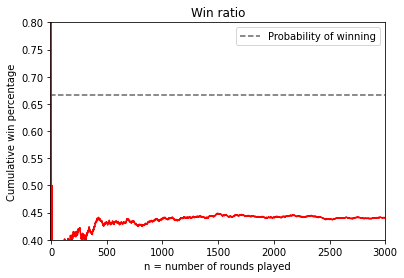

In [108]:
plot_limit = 3000 #plot how the ratio changes oby increasing $n$
x = np.arange(1, plot_limit + 1) 
y = ratios[:plot_limit]
plt.title(r"Win ratio") 
plt.xlabel("n = number of rounds played") 
plt.ylabel(r"Cumulative win percentage") 
plt.axhline(y = 2/3, color = 'k', linestyle='--', alpha = 0.6, label = r"Probability of winning")
plt.plot(x,y, color='r') 
plt.xlim(-5,plot_limit)
plt.ylim(0.4,0.8)
plt.legend()
plt.show()

#### Explanation of theoretical probability
We are switching the cells 33% of the time

#### SWITCHING PROBABILITY (33%)
1/2 (chose tails) * 5/6 (got sum < 9) * 0.8 (got heads on loaded coin) = 0.333


#### NOT SWITCHING PROBABILITY (66%)
1/2 (chose heads) + (1/2 (chose tails) * (1/6 (got sum > 9) + 5/6 (sum > 9) * ) * 0.2(got tails on loaded coin)


= 0.666 or (1 - 0.333)

#### Answer 
Total probability of winning = 2/3 * 0.333 (switching) + 1/3 * 0.6666 (not switching)
= 0.444